In this notebook I derive the [Riemann invariants](https://en.wikipedia.org/wiki/Riemann_invariant) and the trajectories along which they are conserved, for the hydrodynamic equations.

In [2]:
import sympy
sympy.init_printing()

We begin with the governing equations for a smooth flow (without shocks) in one dimensional slab geometry. Conservation of matter

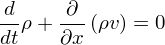

In [9]:
rho = sympy.Symbol('rho') # Density
v = sympy.Symbol('v') # Velocity
t = sympy.Symbol('t') # Time
x = sympy.Symbol('x') # Position
mass_conservation = sympy.Eq(sympy.Derivative(rho,t)+sympy.Derivative(rho*v,x))
mass_conservation

Conservation of momentum

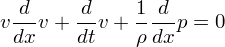

In [15]:
p = sympy.Symbol('p') # Pressure
momentum_conservation = sympy.Eq(sympy.Derivative(v,t)+v*sympy.Derivative(v,x)+sympy.Derivative(p,x)/rho)
momentum_conservation

Conservation of entropy

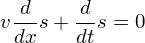

In [16]:
s = sympy.Symbol('s') # Entropy
entropy_conservation = sympy.Eq(sympy.Derivative(s,t)+v*sympy.Derivative(s,x))
entropy_conservation

Expression for the entropy

In [14]:
eta = sympy.Symbol('eta') # Adiabatic index
entropy_expression = sympy.log(p)-eta*sympy.log(rho)
entropy_expression

Matrix form of the equations

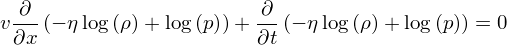

In [20]:
entropy_conservation.subs(s,entropy_expression)

Matrix form

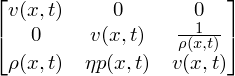

In [41]:
varlist = [rho, p, v]
temp = [mass_conservation, momentum_conservation, entropy_conservation]
temp = [eqn.subs(s, entropy_expression) for eqn in temp]
for vname in varlist:
    temp = [eqn.subs(vname,vname(x,t)) for eqn in temp]
temp = [eqn.doit() for eqn in temp]
temp = sympy.solve(temp,[vname(x,t).diff(t) for vname in varlist])
nhd_matrix = -sympy.Matrix([[v1(x,t).diff(t).subs(temp).coeff(v2(x,t).diff(x)) for v1 in varlist] for v2 in varlist])
nhd_matrix

The eigenvalues of this matrix are the velocities along which the Riemann invariants are conserved, and from the Eigenvectors it is possible to obtain a differential equations for the Riemann invariant

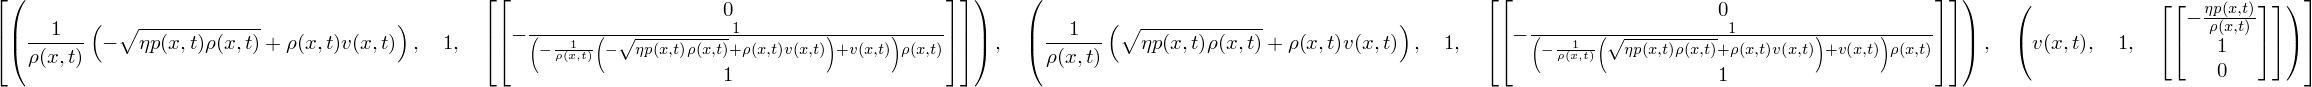

In [59]:
nhd_matrix.eigenvects()

Let's message the first expression to a more convenient form

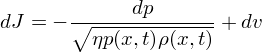

In [72]:
drho = sympy.Symbol(r'd\rho') # Difference in density
dp = sympy.Symbol('dp') # Difference in pressure
dv = sympy.Symbol('dv') # Difference in velocity
dJ = sympy.Symbol('dJ') # Difference in Riemann invariant
temp = sympy.Matrix(nhd_matrix.eigenvects()[0][2][0])
sympy.Eq(dJ, temp.dot([drho,dp,dv]).simplify())